In [0]:
import torch
import cv2
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import PIL
import urllib

In [0]:
image_url = 'https://live.staticflickr.com/65535/48996503523_87dcb80bcc_z.jpg'
image_response = urllib.request.urlopen(image_url)

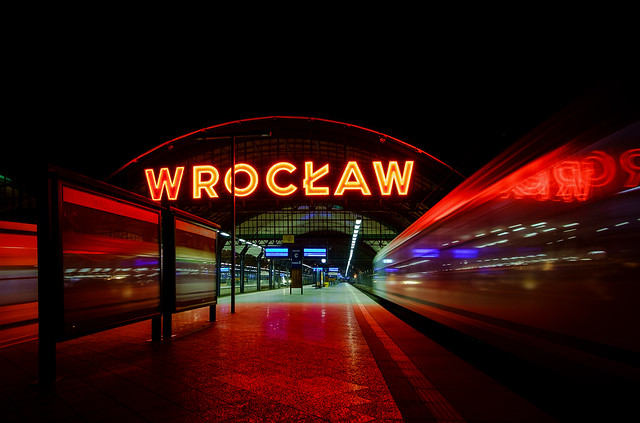

In [4]:
img = Image.open(image_response) 
img

In [0]:
model = maskrcnn_resnet50_fpn(pretrained=True)  

In [6]:
from torchvision.transforms import ToTensor
input_tensor = ToTensor()(img) #ToTensor jest klasą, nie metodą, najpierw trzeba utworzyć instancję tej klasyr
input_tensor.shape

torch.Size([3, 423, 640])

In [0]:
input_tensor = input_tensor.unsqueeze(0)

In [8]:
input_tensor.shape

torch.Size([1, 3, 423, 640])

In [0]:
model.eval()

In [0]:
outputs = model(input_tensor)

In [11]:
len(outputs)

1

In [12]:
output = outputs[0]
output.keys() 

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [0]:
boxes = output['boxes']
labels = output['labels']
scores = output['scores']
masks = output['masks']

In [16]:
labels #categories found in my imag

tensor([ 6,  7,  1,  3,  3,  9,  8,  1,  6,  1,  7,  7, 15,  1,  6,  1,  1, 28,
        85, 85,  1,  1, 65])

#Explainted categories: https://github.com/nightrome/cocostuff/blob/master/labels.md

In [15]:
scores

tensor([0.4835, 0.4579, 0.3548, 0.3298, 0.2991, 0.2575, 0.2174, 0.1908, 0.1803,
        0.1714, 0.1556, 0.1439, 0.1355, 0.1273, 0.1114, 0.0927, 0.0767, 0.0751,
        0.0717, 0.0710, 0.0665, 0.0662, 0.0619], grad_fn=<IndexBackward>)

In [0]:
choosen_class = 7
score_threshold = 0.4
pixels = []

for i in range(len(scores)):
  if scores[i] >= score_threshold and labels[i]== :
    pixels.append(masks[i])

In [28]:
len(pixels)

1

In [194]:
from torchvision.transforms import ToPILImage
import numpy as np

img.size

(640, 423)

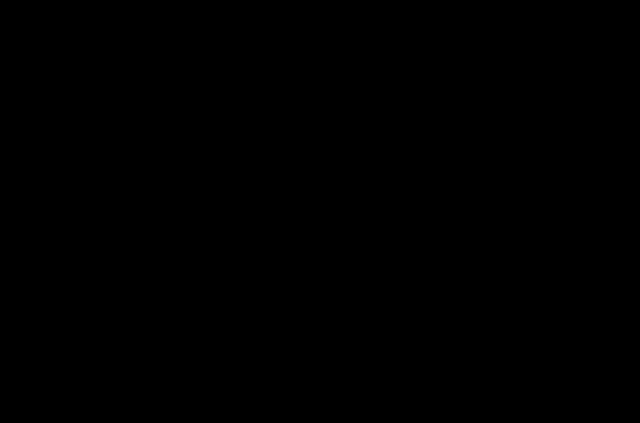

In [195]:
global_mask = np.zeros((img.size[1], img.size[0], 3), dtype='uint8') 
Image.fromarray(global_mask)

In [0]:
threshold = 0.5

for mask in pixels:
  m = np.array(ToPILImage()(mask))
  m = np.expand_dims(m, axis=2) 
  global_mask = global_mask + ((m)>threshold).astype('uint8')

global_mask = (global_mask>0).astype('uint8')*255
# global_mask = global_mask.astype('uint8')

In [197]:
global_mask.shape

(423, 640, 3)

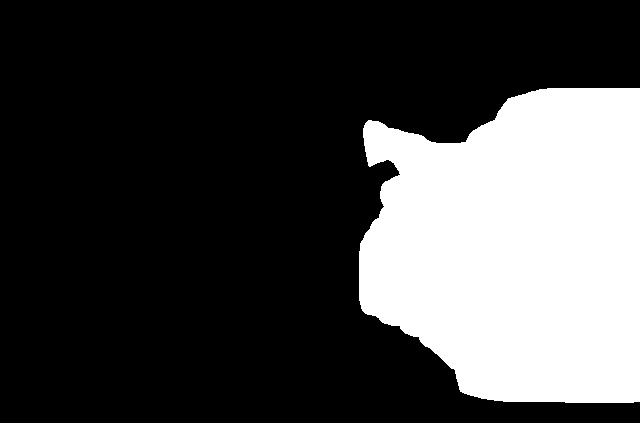

In [146]:
Image.fromarray(global_mask)

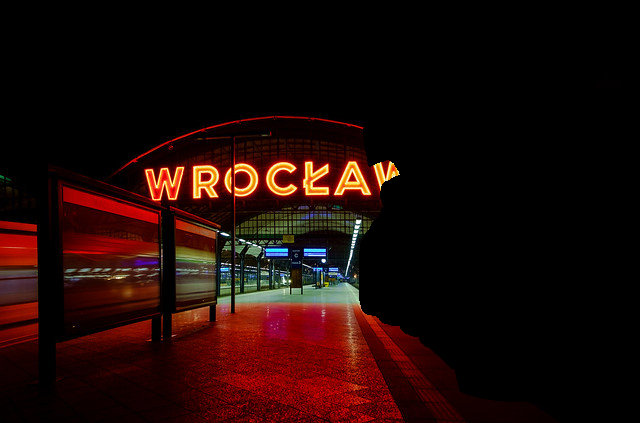

In [147]:
final_image = (np.array(img) * (global_mask==0)).astype('uint8')
Image.fromarray(final_image)

In [148]:
global_mask.shape

(423, 640, 3)

In [149]:
violet_mask = np.full((img.size[1], img.size[0], 3), fill_value=(1), dtype='uint8')

#1 way:
Image.fromarray(violet_mask)
violet = np.array([ 128,0, 128] )
violet = np.tile(violet, [423,640,1]).astype('uint8')
#2 way:
# viol = np.zeros( [423, 640, 3], dtype='uint8')
# viol[:,:] = [128,0, 128]
# Image.fromarray(viol)

violet.shape

(423, 640, 3)

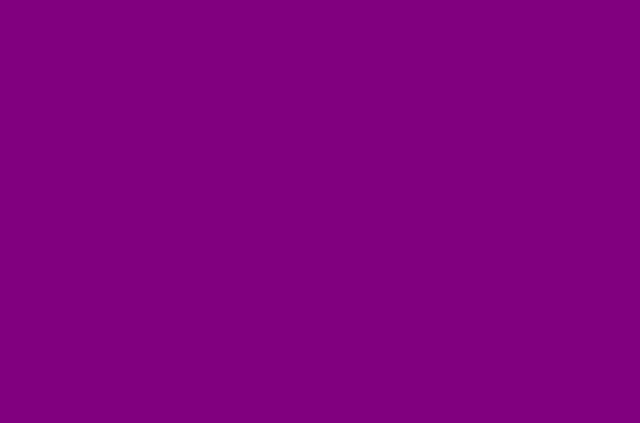

In [151]:
Image.fromarray(violet)

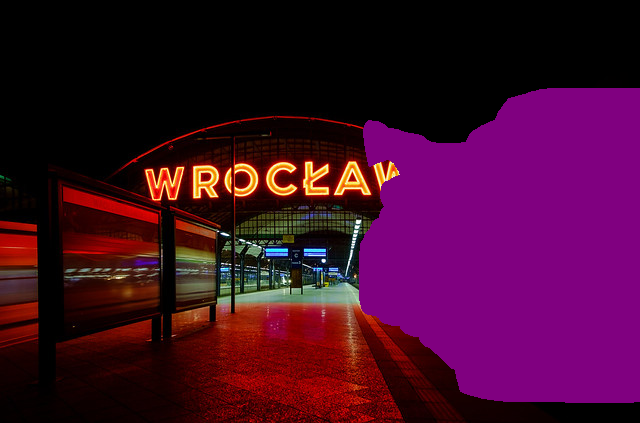

In [152]:
img_orig = np.array(img)
img_mask = np.array(global_mask)

img_final = (img_mask == 255) * violet + (img_mask!=255) * img_orig
img_final = Image.fromarray(img_final)
img_final